### Introduction
The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, So we do the Data wrangling, process which consists of:
Gathering data, Assessing data, Cleaning data, Storing, analyzing, and visualizing your wrangled data
Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations

In [1]:
#import libraries
import pandas as pd
import requests
import json
import re
import os
from datetime import datetime
import time
import matplotlib.pyplot as plt
%matplotlib inline

### Gather Data

###### Reading the Twitter archive file

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


##### Downloading the file using the requests library

In [4]:
folder_name = 'twitter_archive'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
    

In [5]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [6]:
predictions = pd.read_csv('twitter_archive/image-predictions.tsv', sep= '\t')

In [7]:
predictions.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


##### Reading the Twitter data

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [8]:
folder = 'twitterdata'
if not os.path.exists(folder):
    os.makedirs(folder)
    
tweeturl = 'https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'

  

In [9]:
response2 = requests.get(tweeturl)

In [10]:
with open (os.path.join(folder, tweeturl.split('/')[-1]), mode = 'wb') as file:
    file.write(response2.content)

In [11]:
data=[]
list1=[]
retweet_count=[]
favorite_count =[]
created_at = []
text =[]

with open('twitterdata/tweet-json.txt') as json_file:
    for line in json_file:
        data.append(json.loads(line))
for tweet in data:
    list1.append(tweet['id'])
    retweet_count.append(tweet['retweet_count'])
    favorite_count.append(tweet['favorite_count'])
    created_at.append(tweet['created_at'])
    text.append(tweet['full_text'])
    
    

In [12]:
tweet_df = pd.DataFrame(list(zip(list1,retweet_count,favorite_count,created_at,text)), columns = ['tweet_id','retweet_count','favorite_count','created_at', 'full_text'])

In [13]:
tweet_df.head()

,tweet_id,retweet_count,favorite_count,created_at,full_text
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...


### Assessing Data

##### Dataset 1: WeRateDogs Twitter archive

In [14]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [15]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
#missing values
twitter_archive.isnull().sum()


tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [17]:
#finding duplicates if there are any
sum(twitter_archive.duplicated())

0

In [18]:
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [19]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [20]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [21]:
twitter_archive['name'].value_counts()

None            745
a                55
Charlie          12
Cooper           11
Oliver           11
Lucy             11
Penny            10
Tucker           10
Lola             10
Winston           9
Bo                9
the               8
Sadie             8
Daisy             7
Toby              7
an                7
Buddy             7
Bailey            7
Oscar             6
Koda              6
Milo              6
Jax               6
Rusty             6
Stanley           6
Scout             6
Leo               6
Dave              6
Bella             6
Jack              6
Alfie             5
               ... 
Cilantro          1
Kevon             1
Hall              1
Blanket           1
Skittle           1
Josep             1
Kellogg           1
Adele             1
Tobi              1
Kanu              1
Kody              1
Kulet             1
Jeffri            1
Darrel            1
Kuyu              1
Jimbo             1
Mark              1
Ralf              1
Orion             1


In [22]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Data Set 2 Predictions

In [23]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
predictions['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [25]:
#checking for null values
predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [26]:
#checking for duplicates
sum(predictions.duplicated())

0

### Data Set 3 Twitter data extracted

In [27]:
#twitter data 
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
created_at        2354 non-null object
full_text         2354 non-null object
dtypes: int64(3), object(2)
memory usage: 92.0+ KB


In [28]:
sum(tweet_df['tweet_id'].duplicated())

0

In [29]:
#checking for null values
tweet_df.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
created_at        0
full_text         0
dtype: int64

In [30]:
tweet_df['tweet_id'].value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
720775346191278080    1
879492040517615616    1
785927819176054784    1
834209720923721728    1
857062103051644929    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
690938899477221376    1
678800283649069056    1
6815798356684554

#### Quality

Twitter Archive

1) For the name field in the twitter archive a, an are wrongly entered

2) Delete the rows where denominator is greated than 10 

3) TimeStamp column is string

4) There are missing data entries in the name column

5) Text field has unnecessary characters 

6) The source column contains link, we can just omit that

Predictions

1) Some breed names have the first letter lowercase in p1, p2, p3 columns

Tweet_json

1) Dropping the created at and full text columns 

### Tidiness

1) Merge the three data sets

2) Create seperate columns for date and time

3) Create new column for the rating ratio where numerator is divided by denominator

4) Dog stages split into 4 different columns in twitter dataframe

5) Remove the unnecessary columns in twitter archive

## Cleaning

######  We clean each of the issues presented above

In [31]:
#We create a copy of the values
twitter_clean = twitter_archive.copy()
predictions_clean = predictions.copy()
tweetdf_clean = tweet_df.copy()

###### Quality

###### Define

In [32]:
#There are names that are wrongly entered in the twitter archive i.e, all lower case letters are
#wrong names

###### Code

In [33]:
twitter_clean = twitter_clean[twitter_clean['name'].str[0].str.isupper()]

In [34]:
twitter_clean.shape

(2247, 17)

###### Test

In [35]:
len(twitter_clean[twitter_clean['name'].str.islower()])

0

###### Define

In [36]:
# Twitter names also contains none values

###### Code

In [37]:
twitter_clean = twitter_clean[twitter_clean['name'] != "None"]

###### Test

In [38]:
twitter_clean[twitter_clean['name'] == "None"].shape

(0, 17)

###### Define

In [39]:
# Converting the timestamp which is as string data type to datetime

###### Code

In [40]:
twitter_clean['timestamp']= pd.to_datetime(twitter_clean['timestamp'])

###### Test

In [41]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 2325
Data columns (total 17 columns):
tweet_id                      1502 non-null int64
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     1502 non-null datetime64[ns]
source                        1502 non-null object
text                          1502 non-null object
retweeted_status_id           111 non-null float64
retweeted_status_user_id      111 non-null float64
retweeted_status_timestamp    111 non-null object
expanded_urls                 1502 non-null object
rating_numerator              1502 non-null int64
rating_denominator            1502 non-null int64
name                          1502 non-null object
doggo                         1502 non-null object
floofer                       1502 non-null object
pupper                        1502 non-null object
puppo                         1502 non-null object
dtypes: datetime64[ns](1),

###### Define

In [42]:
# Delete the rows where denominator is greater than 10

###### Code

In [43]:
twitter_clean[twitter_clean['rating_denominator'] > 10].shape

(2, 17)

In [44]:
twitter_clean = twitter_clean[twitter_clean['rating_denominator'] <= 10]

###### Test

In [45]:
twitter_clean[twitter_clean['rating_denominator'] > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


###### Define

In [46]:
# The Source column contains link, we can just extract the text part

###### code

In [47]:
twitter_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1434
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          41
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       16
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       9
Name: source, dtype: int64

In [48]:
twitter_clean['source'] = twitter_clean['source'].str.extract('^<a.+>(.+)</a>$')

###### Test

In [49]:
twitter_clean['source'].value_counts()

Twitter for iPhone     1434
Vine - Make a Scene      41
Twitter Web Client       16
TweetDeck                 9
Name: source, dtype: int64

###### Define

In [50]:
#Text field has unnecessary characters 

###### Code

In [51]:
twitter_clean['text']

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
6       Meet Jax. He enjoys ice cream so much he gets ...
8       This is Zoey. She doesn't want to be one of th...
9       This is Cassie. She is a college pup. Studying...
10      This is Koda. He is a South Australian decksha...
11      This is Bruno. He is a service shark. Only get...
13      This is Ted. He does his best. Sometimes that'...
14      This is Stuart. He's sporting his favorite fan...
15      This is Oliver. You're witnessing one of his m...
16      This is Jim. He found a fren. Taught him how t...
17      This is Zeke. He has a new stick. Very proud o...
18      This is Ralphus. He's powering up. Attempting ...
19      RT @dog_rates: This is Canela. She attempted s...
20      This i

In [52]:
twitter_clean = twitter_clean[~twitter_clean['text'].str.contains('RT @')]

###### Test

In [53]:
twitter_clean[twitter_clean['text'].str.contains("RT @")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


###### Define

In [54]:
# Breed names in predictions contains lowe letters

###### Code

In [55]:
predictions_clean['p1']=predictions_clean['p2'].str.title()
predictions_clean['p2']=predictions_clean['p2'].str.title()
predictions_clean['p3']=predictions_clean['p2'].str.title()

###### Test

In [56]:
predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Collie,0.465074,True,Collie,0.156665,True,Collie,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Miniature_Pinscher,0.506826,True,Miniature_Pinscher,0.074192,True,Miniature_Pinscher,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,Malinois,0.596461,True,Malinois,0.138584,True,Malinois,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Redbone,0.408143,True,Redbone,0.360687,True,Redbone,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Rottweiler,0.560311,True,Rottweiler,0.243682,True,Rottweiler,0.154629,True


###### Define

In [57]:
# Dropping the created at and full text columns in twitter json data frame

###### Clean

In [58]:
tweetdf_clean.drop(['created_at', 'full_text'], axis=1, inplace = True)

###### Test

In [59]:
tweetdf_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Tidiness

###### Define

In [60]:
# Remove Unnecessary columns

###### Code

In [61]:
    twitter_clean.drop(['in_reply_to_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_user_id','in_reply_to_status_id','retweeted_status_id'], axis=1, inplace = True)

###### Test

In [62]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1389 entries, 0 to 2325
Data columns (total 12 columns):
tweet_id              1389 non-null int64
timestamp             1389 non-null datetime64[ns]
source                1389 non-null object
text                  1389 non-null object
expanded_urls         1389 non-null object
rating_numerator      1389 non-null int64
rating_denominator    1389 non-null int64
name                  1389 non-null object
doggo                 1389 non-null object
floofer               1389 non-null object
pupper                1389 non-null object
puppo                 1389 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 141.1+ KB


###### Define

In [63]:
# Create seperate Columns for date and time

###### Code

In [64]:
twitter_clean['date'] = pd.DatetimeIndex(twitter_clean['timestamp']).date
twitter_clean['time'] = pd.DatetimeIndex(twitter_clean['timestamp']).time

In [65]:
twitter_clean.drop(['timestamp'], axis = 1, inplace = True)

###### Test

In [66]:
twitter_clean.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,00:18:03
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,15:58:51
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,16:00:24


###### Define

In [67]:
# Ratio between ratings numerator and denominator in Twitter Archive and make a new column

###### Code

In [68]:
twitter_clean['ratings_ratio'] = twitter_clean['rating_numerator']/twitter_clean['rating_denominator']

###### Test

In [69]:
twitter_clean.head(5)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,ratings_ratio
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56,1.3
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27,1.3
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,00:18:03,1.2
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,15:58:51,1.3
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,16:00:24,1.2


###### Define

In [70]:
# Create a single value for dog stages

In [71]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1389 entries, 0 to 2325
Data columns (total 14 columns):
tweet_id              1389 non-null int64
source                1389 non-null object
text                  1389 non-null object
expanded_urls         1389 non-null object
rating_numerator      1389 non-null int64
rating_denominator    1389 non-null int64
name                  1389 non-null object
doggo                 1389 non-null object
floofer               1389 non-null object
pupper                1389 non-null object
puppo                 1389 non-null object
date                  1389 non-null object
time                  1389 non-null object
ratings_ratio         1389 non-null float64
dtypes: float64(1), int64(3), object(10)
memory usage: 162.8+ KB


###### Code

In [72]:
twitter_clean = pd.melt(twitter_clean, id_vars = ['tweet_id', 'date','source','time','ratings_ratio', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'], var_name = 'dog', value_name = 'dog_stage')

###### Test

In [73]:
twitter_clean

,tweet_id,date,source,time,ratings_ratio,text,expanded_urls,rating_numerator,rating_denominator,name,dog,dog_stage
0,892420643555336193,2017-08-01,Twitter for iPhone,16:23:56,1.3,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo,None
1,892177421306343426,2017-08-01,Twitter for iPhone,00:17:27,1.3,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo,None
2,891815181378084864,2017-07-31,Twitter for iPhone,00:18:03,1.2,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,doggo,None
3,891689557279858688,2017-07-30,Twitter for iPhone,15:58:51,1.3,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,doggo,None
4,891327558926688256,2017-07-29,Twitter for iPhone,16:00:24,1.2,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,doggo,None
5,890971913173991426,2017-07-28,Twitter for iPhone,16:27:12,1.3,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,doggo,None
6,890609185150312448,2017-07-27,Twitter for iPhone,16:25:51,1.3,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,doggo,None
7,890240255349198849,2017-07-26,Twitter for iPhone,15:59:51,1.4,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,doggo
8,890006608113172480,2017-07-26,Twitter for iPhone,00:31:25,1.3,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,doggo,None
9,889880896479866881,2017-07-25,Twitter for iPhone,16:11:53,1.3,This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,doggo,None


###### Define

In [74]:
# Joining all the three data frames

###### Code

In [75]:
twitter_first = pd.merge(twitter_clean , predictions_clean , on= 'tweet_id', how ='left')

In [76]:
twitter_first.shape

(5556, 23)

In [77]:
tweetdf_clean.shape

(2354, 3)

In [78]:
twitter_archive_master = pd.merge(twitter_first, tweetdf_clean, on ='tweet_id', how = 'left')

###### Test

In [79]:
twitter_archive_master.head()

,tweet_id,date,source,time,ratings_ratio,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01,Twitter for iPhone,16:23:56,1.3,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,0.097049,False,Bagel,0.085851,False,Bagel,0.076110,False,8853,39467
1,892177421306343426,2017-08-01,Twitter for iPhone,00:17:27,1.3,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,0.323581,True,Pekinese,0.090647,True,Pekinese,0.068957,True,6514,33819
2,891815181378084864,2017-07-31,Twitter for iPhone,00:18:03,1.2,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,0.716012,True,Malamute,0.078253,True,Malamute,0.031379,True,4328,25461
3,891689557279858688,2017-07-30,Twitter for iPhone,15:58:51,1.3,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,0.170278,False,Labrador_Retriever,0.168086,True,Labrador_Retriever,0.040836,False,8964,42908
4,891327558926688256,2017-07-29,Twitter for iPhone,16:00:24,1.2,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,0.555712,True,English_Springer,0.225770,True,English_Springer,0.175219,True,9774,41048


In [80]:
# Consolidating the dog sepecies column
twitter_archive_master['dog_species1'] = twitter_archive_master[twitter_archive_master['p1_dog'] == True]['p1']
twitter_archive_master['dog_species2'] = twitter_archive_master[((twitter_archive_master['p1_dog'] == False) &
                                                                     (twitter_archive_master['p2_dog'] == True))]['p2']
twitter_archive_master['dog_species3'] = twitter_archive_master[((twitter_archive_master['p1_dog'] == False) &
                                                                     (twitter_archive_master['p2_dog'] == False) &
                                                                     (twitter_archive_master['p3_dog'] == True))]['p3']
twitter_archive_master['dog_species'] = twitter_archive_master[['dog_species1','dog_species2','dog_species3']].fillna('').sum(axis=1)

In [81]:
#drop unnecessary columns
twitter_archive_master.drop(['dog','dog_species1','dog_species2','dog_species3'], axis=1,inplace= True)

In [82]:
twitter_archive_master.drop(['p1','p1_conf','p2','p2_conf','p3','p3_conf'], axis=1,inplace= True)

###### Analysis and Visualization

In [83]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5556 entries, 0 to 5555
Data columns (total 19 columns):
tweet_id              5556 non-null int64
date                  5556 non-null object
source                5556 non-null object
time                  5556 non-null object
ratings_ratio         5556 non-null float64
text                  5556 non-null object
expanded_urls         5556 non-null object
rating_numerator      5556 non-null int64
rating_denominator    5556 non-null int64
name                  5556 non-null object
dog_stage             5556 non-null object
jpg_url               5392 non-null object
img_num               5392 non-null float64
p1_dog                5392 non-null object
p2_dog                5392 non-null object
p3_dog                5392 non-null object
retweet_count         5556 non-null int64
favorite_count        5556 non-null int64
dog_species           5556 non-null object
dtypes: float64(2), int64(5), object(12)
memory usage: 868.1+ KB


In [84]:
# Dropping all the null values present
twitter_archive_master.dropna(inplace = True)

In [85]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5392 entries, 0 to 5555
Data columns (total 19 columns):
tweet_id              5392 non-null int64
date                  5392 non-null object
source                5392 non-null object
time                  5392 non-null object
ratings_ratio         5392 non-null float64
text                  5392 non-null object
expanded_urls         5392 non-null object
rating_numerator      5392 non-null int64
rating_denominator    5392 non-null int64
name                  5392 non-null object
dog_stage             5392 non-null object
jpg_url               5392 non-null object
img_num               5392 non-null float64
p1_dog                5392 non-null object
p2_dog                5392 non-null object
p3_dog                5392 non-null object
retweet_count         5392 non-null int64
favorite_count        5392 non-null int64
dog_species           5392 non-null object
dtypes: float64(2), int64(5), object(12)
memory usage: 842.5+ KB


In [86]:
sum(twitter_archive_master.duplicated())

3863

In [87]:
twitter_archive_master.drop_duplicates(inplace=True)

In [88]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1529 entries, 0 to 4813
Data columns (total 19 columns):
tweet_id              1529 non-null int64
date                  1529 non-null object
source                1529 non-null object
time                  1529 non-null object
ratings_ratio         1529 non-null float64
text                  1529 non-null object
expanded_urls         1529 non-null object
rating_numerator      1529 non-null int64
rating_denominator    1529 non-null int64
name                  1529 non-null object
dog_stage             1529 non-null object
jpg_url               1529 non-null object
img_num               1529 non-null float64
p1_dog                1529 non-null object
p2_dog                1529 non-null object
p3_dog                1529 non-null object
retweet_count         1529 non-null int64
favorite_count        1529 non-null int64
dog_species           1529 non-null object
dtypes: float64(2), int64(5), object(12)
memory usage: 238.9+ KB


In [89]:
# Statistics of the data frame
twitter_archive_master.describe()

,tweet_id,ratings_ratio,rating_numerator,rating_denominator,img_num,retweet_count,favorite_count
count,1.529000e+03,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000
mean,7.455704e+17,1.195833,11.951602,9.998038,1.222368,2779.756050,9508.293656
std,6.872657e+16,4.522048,45.217916,0.076722,0.592490,4045.911794,11882.162194
min,6.664188e+17,0.200000,2.000000,7.000000,1.000000,23.000000,107.000000
25%,6.808896e+17,1.000000,10.000000,10.000000,1.000000,735.000000,2420.000000
50%,7.280156e+17,1.100000,11.000000,10.000000,1.000000,1595.000000,5005.000000
75%,8.025727e+17,1.200000,12.000000,10.000000,1.000000,3347.000000,12357.000000
max,8.924206e+17,177.600000,1776.000000,10.000000,4.000000,56625.000000,107956.000000


Text(0.5, 1.0, 'retweets vs favourites')

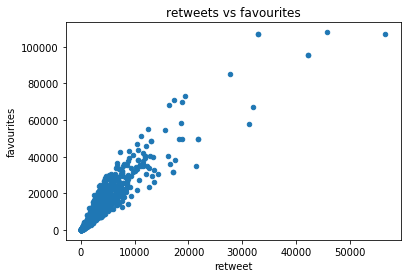

In [90]:
## Favourite vs retweet count
twitter_archive_master.plot.scatter('retweet_count', 'favorite_count')
plt.xlabel('retweet')
plt.ylabel('favourites')
plt.title('retweets vs favourites')

###### We can see that there is  a strong positive correlation between retweets and favourites

In [91]:
# Dogs which have the highest rating ratio
twitter_archive_master[twitter_archive_master['ratings_ratio']==1].shape

(310, 19)

###### There are about 310 that has the highest ratings ratio

In [92]:
# Dogs that have the highest favourite count
twitter_archive_master['favorite_count'].max()

107956

In [93]:
twitter_archive_master[twitter_archive_master['favorite_count'] == 107956 ]

,tweet_id,date,source,time,ratings_ratio,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1_dog,p2_dog,p3_dog,retweet_count,favorite_count,dog_species
46,879415818425184262,2017-06-26,Twitter for iPhone,19:07:24,1.3,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,None,https://pbs.twimg.com/ext_tw_video_thumb/87941...,1.0,True,True,True,45849,107956,Boston_Bull


In [94]:
#The dog that has recevied the favourite count is  dudles and species is boston_bull

In [95]:
# Dogs that have the highest retweet count
twitter_archive_master['retweet_count'].max()

56625

In [96]:
twitter_archive_master[twitter_archive_master['retweet_count'] == 31989 ]

,tweet_id,date,source,time,ratings_ratio,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1_dog,p2_dog,p3_dog,retweet_count,favorite_count,dog_species
1102,676219687039057920,2015-12-14,Twitter for iPhone,01:58:31,1.0,This is Kenneth. He's stuck in a bubble. 10/10...,https://twitter.com/dog_rates/status/676219687...,10,10,Kenneth,None,https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg,1.0,False,False,True,31989,67100,Leafhopper


Text(0.5, 1.0, 'Ratings distribution')

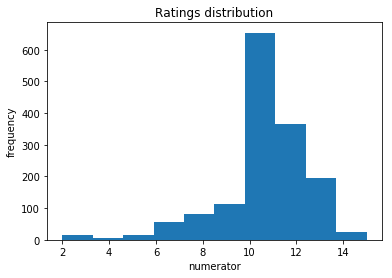

In [97]:
# Rating frequency 
plt.hist(twitter_archive_master['rating_numerator'], range= (2,15))
plt.xlabel('numerator')
plt.ylabel('frequency')
plt.title('Ratings distribution')

###### From the above figure we can staythat our distribution is left skewed

In [98]:
# Dog with highest rating
twitter_archive_master['rating_numerator'].max()
twitter_archive_master[twitter_archive_master['rating_numerator']== 1776]


,tweet_id,date,source,time,ratings_ratio,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1_dog,p2_dog,p3_dog,retweet_count,favorite_count,dog_species
587,749981277374128128,2016-07-04,TweetDeck,15:00:45,177.6,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1.0,False,False,False,2772,5569,


In [99]:
# The dog that has received the highest rating is atticus

In [100]:
# Breed of dogs that are popular
twitter_archive_master['dog_species'].value_counts().head(5)

                      191
Labrador_Retriever     76
Golden_Retriever       65
Cardigan               56
French_Bulldog         35
Name: dog_species, dtype: int64

In [101]:
# We can see that labrador and golden retriever are most famous dog breed

In [102]:
#Stage of dogs that are famous 
twitter_archive_master['dog_stage'].value_counts()

None       1348
pupper      121
doggo        40
puppo        15
floofer       5
Name: dog_stage, dtype: int64

In [103]:
# Pupper is the initial stage and they recevied counts

In [104]:
#Dog stage Vs retweets
dogspecies = twitter_archive_master.groupby(twitter_archive_master['dog_species'])['favorite_count'].sum().sort_values(ascending=False).reset_index()


In [105]:
dogspecies = dogspecies.head(10)

In [106]:
dogspecies = pd.DataFrame(dogspecies)

Text(0.5, 1.0, 'Breed vs favourites')

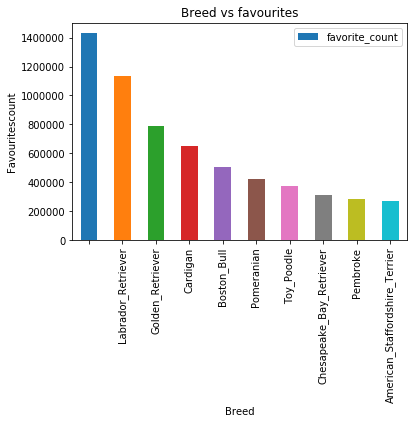

In [107]:
dogspecies.plot.bar(x='dog_species',y='favorite_count')
plt.xlabel('Breed')
plt.ylabel('Favouritescount')
plt.title('Breed vs favourites')

In [108]:
#labrador retreiver is the breed of dog that is mostly rated 


In [109]:
# Reading the data frome into a csv file
twitter_archive_master.to_csv(r'C:\Users\lekha\OneDrive\Desktop\Udacity\Data Wrangling\export_dataframe.csv')
